In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2

In [3]:
# Data from Table 3
models = ['2B', '9B']
alignment_features = [11143, 2920]
style_features = [15391, 1889]
lpf_ratios = [36.78, 5.52]  # Style/Alignment ratio

# Data from Table 5
models_labels = ['Gemma-2-2B-it', 'Gemma-2-9B-it']
standard_tqa = [56.10, 62.08]
ablated_tqa = [60.13, 62.80]

Saved: feature_category_sizes.svg


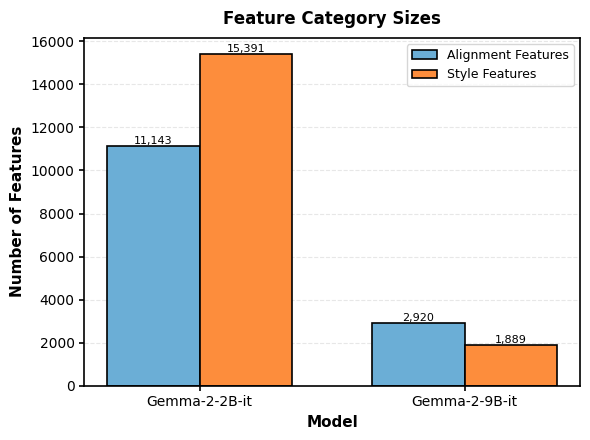

In [4]:
# Figure 1: Feature Category Sizes
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4.5))

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, alignment_features, width, label='Alignment Features', 
                color='#6baed6', edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, style_features, width, label='Style Features',
                color='#fd8d3c', edgecolor='black', linewidth=1.2)

ax1.set_ylabel('Number of Features', fontsize=11, fontweight='bold')
ax1.set_xlabel('Model', fontsize=11, fontweight='bold')
ax1.set_title('Feature Category Sizes', fontsize=12, fontweight='bold', pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels([f'Gemma-2-{m}-it' for m in models])
ax1.legend(frameon=True, fontsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('feature_category_sizes.svg', format='svg', bbox_inches='tight', dpi=300)
print("Saved: feature_category_sizes.svg")
plt.show()


Saved: causal_impact_ratio.svg


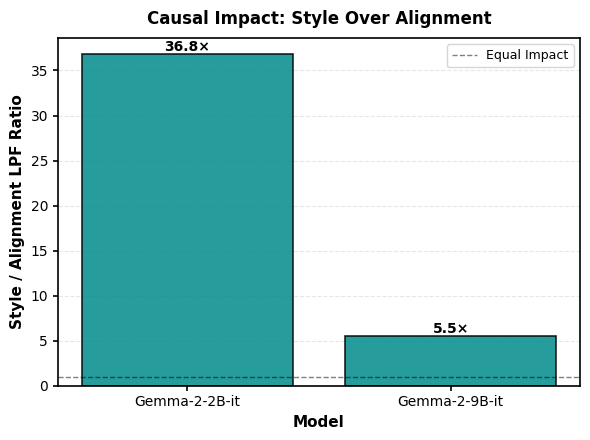

In [12]:
# Figure 2: Causal Impact Ratio (Style over Alignment)
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4.5))

bars3 = ax2.bar(x, lpf_ratios, color='#008B8B', edgecolor='black', linewidth=1.2, alpha=0.85)

ax2.set_ylabel('Style / Alignment LPF Ratio', fontsize=11, fontweight='bold')
ax2.set_xlabel('Model', fontsize=11, fontweight='bold')
ax2.set_title('Causal Impact: Style Over Alignment', fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(x)
ax2.set_xticklabels([f'Gemma-2-{m}-it' for m in models])
# ax2.set_yscale('log')
ax2.grid(axis='y', alpha=0.3, linestyle='--', which='both')
ax2.set_axisbelow(True)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Equal Impact')

# Add value labels
for i, (bar, val) in enumerate(zip(bars3, lpf_ratios)):
    ax2.text(bar.get_x() + bar.get_width()/2., val * 1.0,
            f'{val:.1f}×',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.legend(frameon=True, fontsize=9)

plt.tight_layout()
plt.savefig('causal_impact_ratio.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig('causal_impact_ratio.png', format='png', bbox_inches='tight', dpi=2000)
print("Saved: causal_impact_ratio.svg")
plt.show()


Saved: truthfulness_improvement.svg


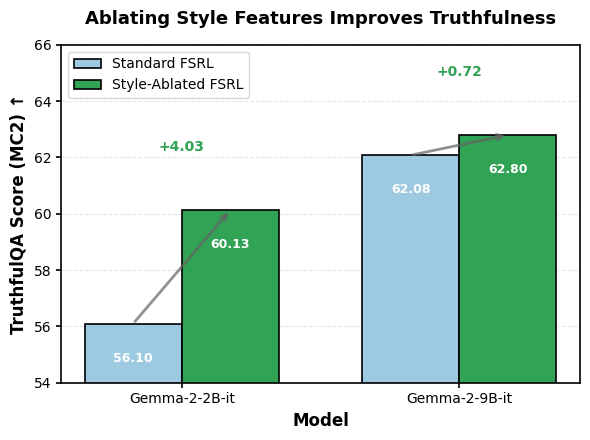


All figures saved successfully!


In [6]:
# Figure 3: TruthfulQA improvements with style ablation (Table 5)
fig3, ax = plt.subplots(1, 1, figsize=(6, 4.5))

x = np.arange(len(models_labels))
width = 0.35

bars1 = ax.bar(x - width/2, standard_tqa, width, label='Standard FSRL',
               color='#9ecae1', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, ablated_tqa, width, label='Style-Ablated FSRL',
               color='#31a354', edgecolor='black', linewidth=1.2)

# Calculate and display improvements
for i in range(len(models_labels)):
    improvement = ablated_tqa[i] - standard_tqa[i]
    mid_x = x[i]
    y_pos = max(standard_tqa[i], ablated_tqa[i]) + 0.5
    
    # Arrow showing improvement
    ax.annotate('', xy=(mid_x + width/2, ablated_tqa[i]), 
                xytext=(mid_x - width/2, standard_tqa[i]),
                arrowprops=dict(arrowstyle='->', lw=2, color='#636363', alpha=0.7))
    
    # Improvement text
    ax.text(mid_x, y_pos + 1.5, f'+{improvement:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold',
            color='#31a354')

ax.set_ylabel('TruthfulQA Score (MC2) ↑', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Ablating Style Features Improves Truthfulness', 
             fontsize=13, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(models_labels)
ax.legend(frameon=True, fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylim(54, 66)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height - 1,
                f'{height:.2f}',
                ha='center', va='top', fontsize=9, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('truthfulness_improvement.svg', format='svg', bbox_inches='tight', dpi=300)
print("Saved: truthfulness_improvement.svg")
plt.show()

print("\nAll figures saved successfully!")